In [1]:
# Import the necessary libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
nr_qubits = 4
control_qubit = 0 #Usually just the first qubit


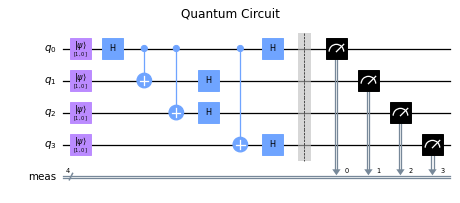

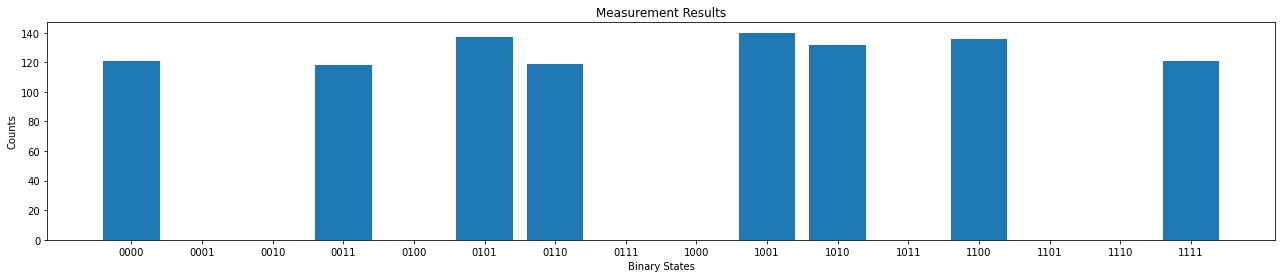

In [4]:
# Create a quantum circuit
qc = QuantumCircuit(nr_qubits)

def initialize_all_zeros(nr_qubits):
    # Create a quantum circuit with N qubits
    qc = QuantumCircuit(nr_qubits)
    
    # Initialize all qubits in the |0⟩ state
    for qubit in range(nr_qubits):
        qc.initialize([1, 0], qubit)
    
    return qc

def apply_cnot_chain(qc, control_qubit, nr_qubits):
    # Apply CNOT gates from the control qubit to the list of target qubits
    for target_qubit in range(nr_qubits-1):
        qc.cx(control_qubit, target_qubit+1)




qc = initialize_all_zeros(nr_qubits)
# Apply a Hadamard gate to qubit 0
qc.h(control_qubit)
apply_cnot_chain(qc, control_qubit, nr_qubits)




# Apply Hadamard gates to all qubits in the X-axis (Hadamard basis)
for qubit in range(nr_qubits):
    qc.h(qubit)

# Add measurements to the circuit
qc.measure_all()

# Simulate the circuit and get measurement results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)  # You can adjust the number of shots
result = job.result()
counts = result.get_counts(qc)

# Create a list of binary state labels for N qubits
state_labels = [format(i, '0{0}b'.format(nr_qubits)) for i in range(2**nr_qubits)]


# Extract the counts in the order of the state labels
state_counts = [counts.get(label, 0) for label in state_labels]

# Create a subplot with two plots
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# # Plot the circuit diagram
# axs[0].set_title("Quantum Circuit")
# qc.draw(output='mpl', ax=axs[0])

# # Plot the histogram with x-axis labels
# axs[1].set_title("Measurement Results")
# axs[1].bar(state_labels, state_counts)
# axs[1].set_xlabel('Binary States')
# axs[1].set_ylabel('Counts')

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show both plots
# plt.show()

# fig_qc = plt.figure(figsize=(8, 8))
# ax_qc = fig_qc.add_subplot(111)
# ax_qc.set_title("Quantum Circuit")
# qc.draw(output='mpl', ax=ax_qc)

# # Create a figure for the histogram plot
# fig_hist = plt.figure(figsize=(22, 4))
# ax_hist = fig_hist.add_subplot(111)
# ax_hist.set_title("Measurement Results")
# ax_hist.bar(state_labels, state_counts)
# ax_hist.set_xlabel('Binary States')
# ax_hist.set_ylabel('Counts')

# # Show both plots separately
# plt.show()

# Create a figure for the quantum circuit diagram
fig_qc = plt.figure(figsize=(8, 8))
ax_qc = fig_qc.add_subplot(111)
ax_qc.set_title("Quantum Circuit")

# Set the background color of the entire figure to white
fig_qc.patch.set_facecolor('white')

# Draw the quantum circuit
qc.draw(output='mpl', ax=ax_qc)

# Create a figure for the histogram plot
fig_hist = plt.figure(figsize=(22, 4))
ax_hist = fig_hist.add_subplot(111)
ax_hist.set_title("Measurement Results")
ax_hist.bar(state_labels, state_counts)
ax_hist.set_xlabel('Binary States')
ax_hist.set_ylabel('Counts')

# Show both plots separately
plt.show()




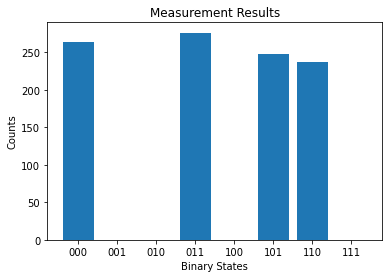

In [29]:


# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Initialize all qubits in the |0⟩ state
qc.initialize([1, 0], 0)  # Initialize qubit 0 in |0⟩
qc.initialize([1, 0], 1)  # Initialize qubit 1 in |0⟩
qc.initialize([1, 0], 2)  # Initialize qubit 2 in |0⟩

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gates from qubit 0 to qubits 1 and 2
qc.cx(0, 1)  # CNOT from qubit 0 to qubit 1
qc.cx(0, 2)  # CNOT from qubit 0 to qubit 2

# Measure all qubits in the X-axis (Hadamard basis)
qc.h(0)
qc.h(1)
qc.h(2)

# Add measurements to the circuit
qc.measure_all()
qc.draw(output='mpl')
plt.show()


# Simulate the circuit and get measurement results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)  # You can adjust the number of shots
result = job.result()
counts = result.get_counts(qc)

# Create a list of binary state labels
state_labels = [format(i, '03b') for i in range(8)]

# Extract the counts in the order of the state labels
state_counts = [counts.get(label, 0) for label in state_labels]

# Create a bar chart with x-axis labels
plt.bar(state_labels, state_counts)
plt.xlabel('Binary States')
plt.ylabel('Counts')
plt.title('Measurement Results')
plt.show()


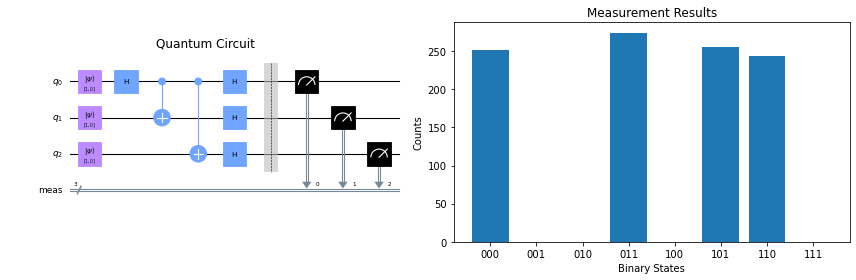

In [30]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Initialize all qubits in the |0⟩ state
qc.initialize([1, 0], 0)  # Initialize qubit 0 in |0⟩
qc.initialize([1, 0], 1)  # Initialize qubit 1 in |0⟩
qc.initialize([1, 0], 2)  # Initialize qubit 2 in |0⟩

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gates from qubit 0 to qubits 1 and 2
qc.cx(0, 1)  # CNOT from qubit 0 to qubit 1
qc.cx(0, 2)  # CNOT from qubit 0 to qubit 2

# Measure all qubits in the X-axis (Hadamard basis)
qc.h(0)
qc.h(1)
qc.h(2)

# Add measurements to the circuit
qc.measure_all()

# Simulate the circuit and get measurement results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)  # You can adjust the number of shots
result = job.result()
counts = result.get_counts(qc)

# Create a list of binary state labels
state_labels = [format(i, '03b') for i in range(8)]

# Extract the counts in the order of the state labels
state_counts = [counts.get(label, 0) for label in state_labels]

# Create a subplot with two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the circuit diagram
axs[0].set_title("Quantum Circuit")
qc.draw(output='mpl', ax=axs[0])

# Plot the histogram with x-axis labels
axs[1].set_title("Measurement Results")
axs[1].bar(state_labels, state_counts)
axs[1].set_xlabel('Binary States')
axs[1].set_ylabel('Counts')

# Adjust spacing between subplots
plt.tight_layout()

# Show both plots
plt.show()
